## Author : Loka Akash Reddy
### LGM VIP - Data Science September-2021
### Task 1 : Iris Flowers Classification Machine Learning Project
### Dataset : http://archive.ics.uci.edu/ml/datasets/Iris
### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt

from IPython.display import HTML
from sklearn.metrics import confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [3]:
df = pd.read_csv('iris.data', names = "Sepal_Length Sepal_Width Petal_Length Petal_Width Species".split())
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Inspecting Data

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#statistucal summary 
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [8]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

### Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [11]:
df.Species.unique()
#Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2

array([0, 1, 2])

In [12]:
report=sv.analyze(source=df)
report.show_html('iris report.html')

                                             |                                             | [  0%]   00:00 ->…

Report iris report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
from pandas_profiling import ProfileReport

In [14]:
pro = ProfileReport(df)
pro.to_file('output.html')

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Exploratory Data Analysis

<AxesSubplot:xlabel='Species', ylabel='count'>

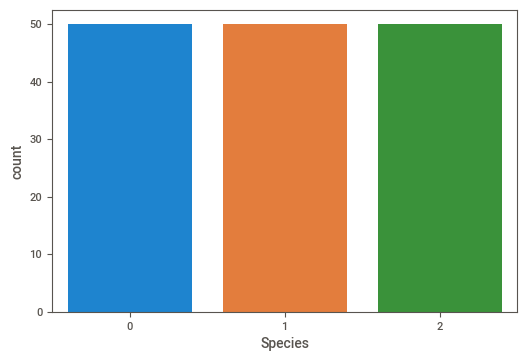

In [15]:
sns.countplot(df['Species'])

<AxesSubplot:ylabel='Species'>

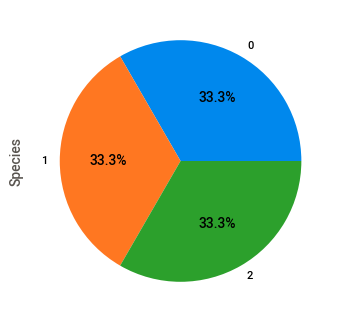

In [16]:
df['Species'].value_counts().plot(kind='pie', autopct="%.1f%%")

This indicates we have balanced dataset

### Data Visualization

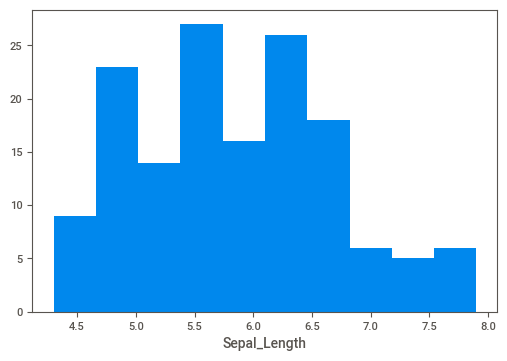

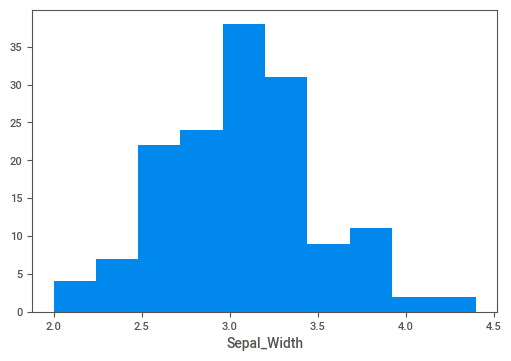

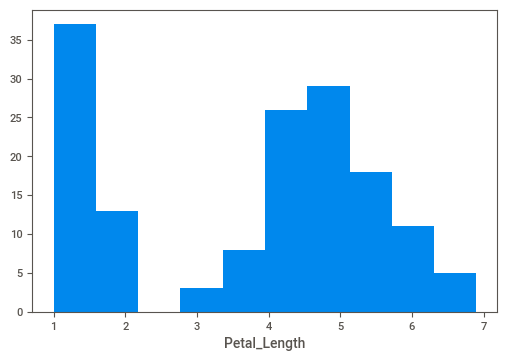

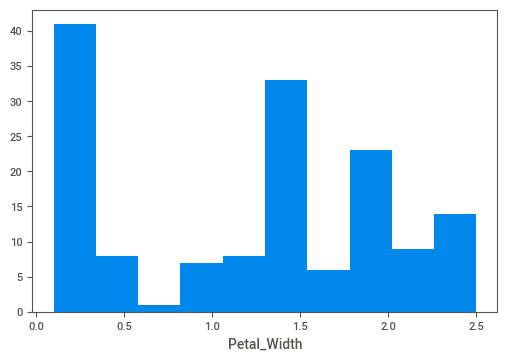

In [17]:
for i in df.columns[:-1]:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()

Petal Length and Petal width are bimodal.

Sepal Length and Sepal width are unimodal and seems to be normally distributed.

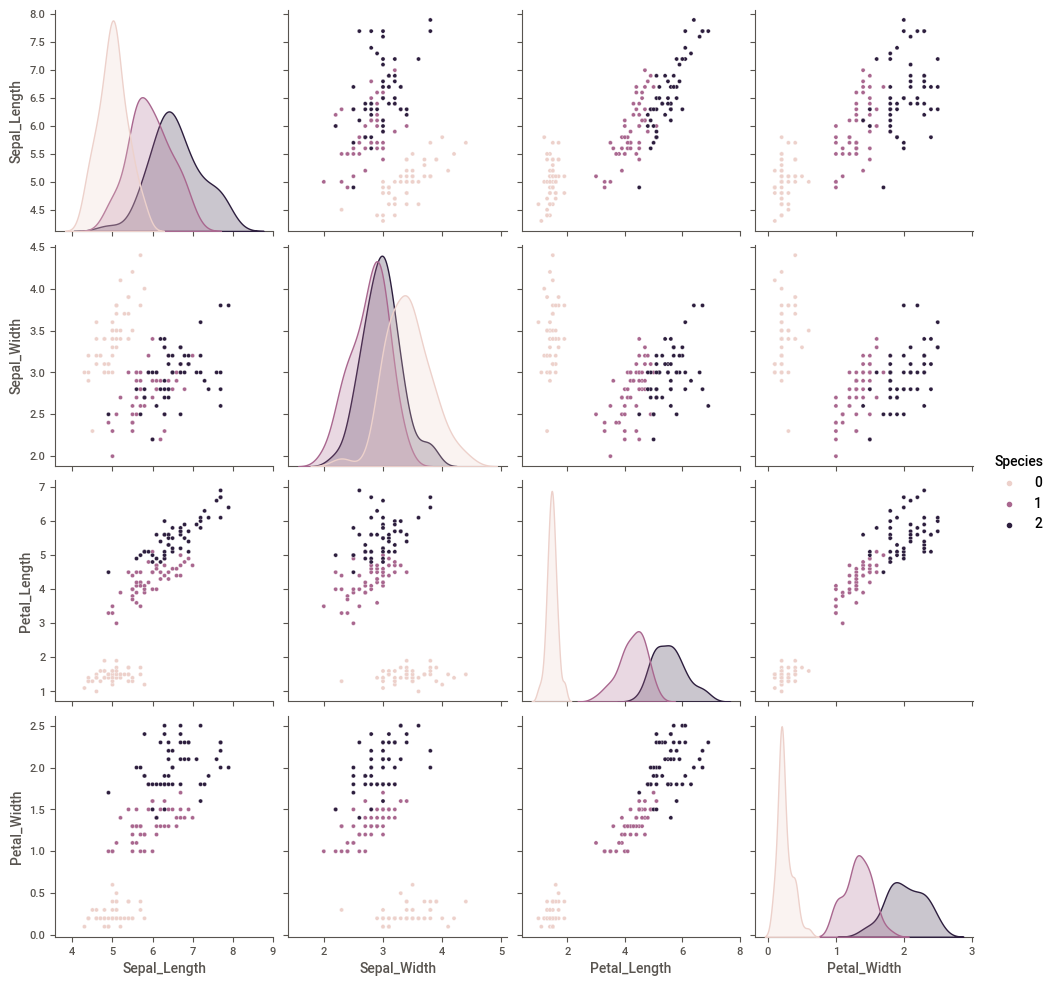

In [18]:
sns.pairplot(df, hue = "Species")
plt.show()

Setosa is linearly seperable but versicolor and virginica are overlapping

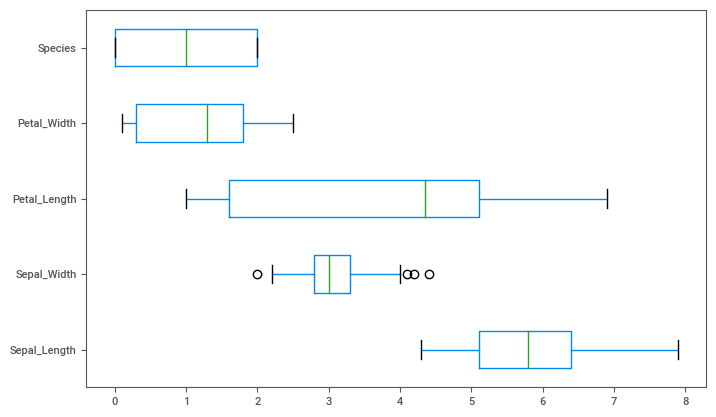

In [19]:
df.plot(kind='box',figsize=(8,5), vert=False);

### Sepal_Width seems to have outliers

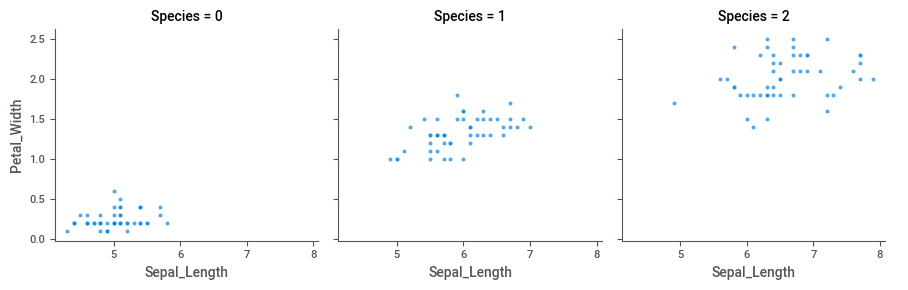

In [20]:
grid = sns.FacetGrid(df, col="Species");
grid.map(sns.scatterplot, "Sepal_Length","Petal_Width", alpha=.7);
grid.add_legend()

### Correlation matrix

In [21]:
corr = df.corr()
corr

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
Sepal_Length,1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal_Width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal_Length,0.871754,-0.420516,1.000000,0.962757,0.949043
Petal_Width,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


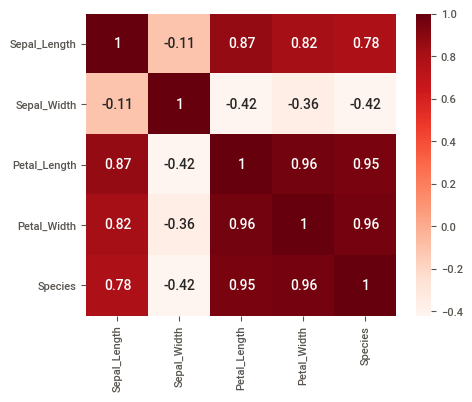

In [22]:
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'Reds')
plt.show()

### The data seems to highly correleated with each other

### Model Training

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df['Species'] = le.fit_transform(df["Species"])

In [25]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
x = df.drop(columns=["Species"])
y = df["Species"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [27]:
model = LinearRegression()

In [28]:
model.fit(xtrain,ytrain)

LinearRegression()

In [29]:
model.coef_

array([-0.18145404, -0.00060379,  0.31145508,  0.48957442])

In [30]:
model.score(xtest,ytest)*100

91.89707585088198

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)*100

100.0

In [32]:
ypred = model.predict(xtest)
ypred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1], dtype=int64)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(np.sqrt(mean_squared_error(ytest,ypred)))
print(mean_absolute_error(ytest,ypred))
print(r2_score(ytest,ypred)*100)

0.0
0.0
100.0


### Prediction

In [34]:
predict = model.predict(xtest)
print('Predicted Values on Test Data',predict)

Predicted Values on Test Data [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1]


In [35]:
ytest_pred = model.predict(xtest)
ytrain_pred = model.predict(xtrain)

In [36]:
print("Training Accuracy: ", accuracy_score(ytrain, ytrain_pred))
print("Test Accuracy: ", accuracy_score(ytest, ytest_pred))

Training Accuracy:  0.9714285714285714
Test Accuracy:  1.0


### K-Means

In [37]:
from sklearn.cluster import KMeans
x = df.iloc[:,[0,1,2,3]].values

wcss = [] # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Plotting the results

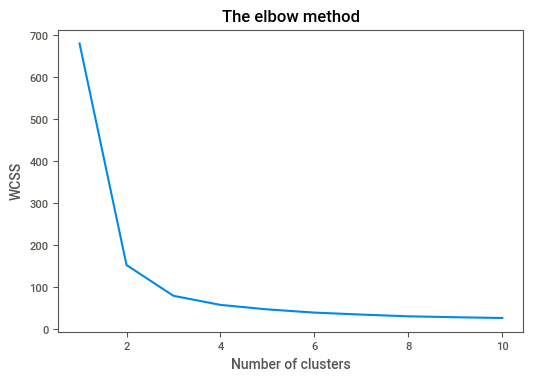

In [38]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### Applying K-Means

In [39]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualising the Clusters

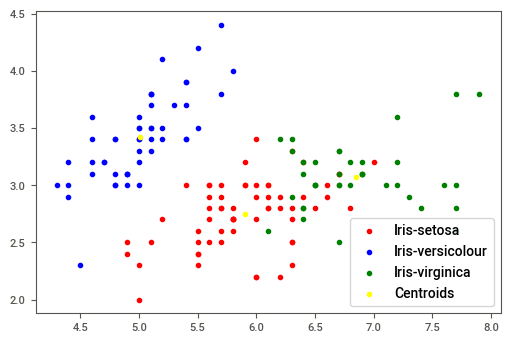

In [40]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'yellow', label = 'Centroids')
plt.legend()

## Thank You